In [1]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [3]:
df = pd.read_csv(r'CAR DETAILS.csv')

#### Shape

In [4]:
df.shape

(4340, 8)

#### Handling Null values

In [5]:
# nv = null values
nv_df = df.isnull().sum()
nv_df = nv_df[nv_df>0]
nv_df

Series([], dtype: int64)

#### Checking Duplicates

In [4]:
print(df.duplicated().sum())

763


# dropping all the duplicate value

In [5]:
df.drop_duplicates(keep='first')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


####  Checking the datatypes

In [8]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

# checking all columns name

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# checking for unique value 

In [10]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())



['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [11]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# EDA

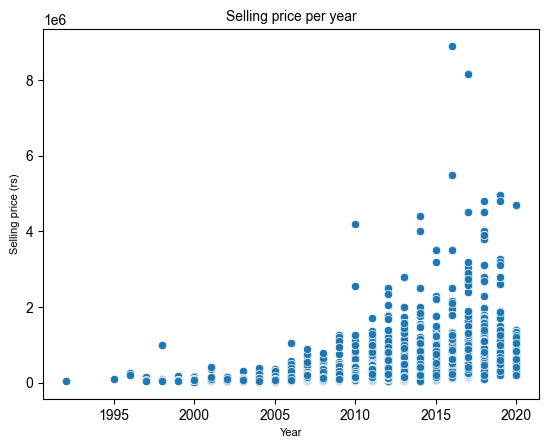

In [13]:

sns.scatterplot(data=df, x="year", y="selling_price")
sns.set_style('darkgrid')
plt.title("Selling price per year", size=10)
plt.ylabel("Selling price (rs)", size=8)
plt.xlabel("Year", size=8)
plt.show()

In [14]:
import plotly.express as px

CAR_DETAILS = df.sort_values(by='selling_price', ascending=False, na_position='last')
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='name', y='year', color='selling_price')
fig.update_layout(
    title='Seeing  the top selling car name by year', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [15]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='owner', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by owners ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [16]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(50)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='fuel', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by fuel type', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [17]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(100)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='seller_type', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by seller type', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [18]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(50)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='transmission', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by transmission ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [19]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='name')
fig.update_layout(
    title='Seeing which car is mostly bought by people', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [20]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, y='year', histfunc='count')
fig.update_layout(
    title='Seeing which year has more cars', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [21]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, y='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing average how much people ride their car', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [22]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='transmission')
fig.update_layout(
    title="Seeing what kind of transmission people's prefer to ride", 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [23]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='seller_type')
fig.update_layout(
    title="Seeing how people's prefer selling their car solo or though agent ", 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [24]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='owner')
fig.update_layout(
    title='Seeing how many people prefer buying new or used car', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [25]:

# Filtered owner
CAR_DETAILS = df[CAR_DETAILS['owner'] == 'Second Owner']

# Sorted owner in ascending order
CAR_DETAILS = df.sort_values(by='owner', ascending=True, na_position='first')


C:\Users\yokau\AppData\Local\Temp\ipykernel_24896\3881519775.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [26]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = CAR_DETAILS.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing when people willing to buy second hand cars by km driven', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [27]:

# Filtered owner
CAR_DETAILS = df[CAR_DETAILS['owner'] == 'Third Owner']


C:\Users\yokau\AppData\Local\Temp\ipykernel_24896\1404283948.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [28]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS, x='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing till how much km driven car 3rd owner  people can buy', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [66]:
car= df.sort_values(by='km_driven', ascending=False, na_position='last')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
3703,Ford EcoSport 1.5 Diesel Trend BSIV,2018,841000,1000,Diesel,Individual,Manual,First Owner
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car


In [68]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = car.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(df_filtered, y='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing till how much max km driven car people can buy', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [30]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='year', points='outliers')
fig.update_layout(
    title=' box plot of year column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [31]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='selling_price', points='outliers')
fig.update_layout(
    title='box plot of selling_price column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [32]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='km_driven', points='outliers')
fig.update_layout(
    title='km_driven  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [33]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='fuel', points='outliers')
fig.update_layout(
    title='fuel box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [34]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='seller_type', points='outliers')
fig.update_layout(
    title='seller_type  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [35]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='owner', points='outliers')
fig.update_layout(
    title='owner  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

# making new data set

In [6]:
final_dataset=df[['name','year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [70]:
final_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


 # creating a column current year

In [7]:
final_dataset['current_year']=2023

In [72]:
final_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,2023
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,2023


# finding the how many years is passed after purchasing the car

In [8]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']

In [15]:
final_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023,9
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2023,9
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,2023,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,2023,7


# droping both year and current_year 

In [9]:
final_dataset.drop(['year'],axis=1,inplace=True)
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [19]:
final_dataset

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,7


In [79]:
final_dataset_filtered = final_dataset.sort_values(by='no_year', ascending=False, na_position='last')

In [82]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
final_dataset_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset_filtered, y='no_year', histfunc='count')
fig.update_layout(
    title='seeing how many years is passed after the car is purchased ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [83]:
final_dataset1 = final_dataset[final_dataset['no_year'] >= 20]


In [84]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(final_dataset1, x='no_year', y='selling_price', color='no_year')
fig.update_layout(
    title='seeing the selling price of car whose age is more than 20 years', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [87]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset1, y='transmission', histfunc='count')
fig.update_layout(
    title='seeing the transmission  of car whose age is more than 20 years', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [88]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset1, x='km_driven', histfunc='count')
fig.update_layout(
    title='seeing the km driven  of car whose age is more than 20 years', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [50]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset, x='seller_type', histfunc='count')
fig.update_layout(
    title='seeing how the  car whose age is more than 20 years were sold', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [51]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset, x='fuel', histfunc='count')
fig.update_layout(
    title='seeing the fuel type  of car whose age is more than 20 years', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [52]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(final_dataset, x='owner', histfunc='count')
fig.update_layout(
    title='seeing the owner  of car whose age is more than 20 years', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [54]:
final_dataset

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
61,Mahindra Jeep CL 500 MDI,250000,35000,Diesel,Individual,Manual,Second Owner,27
137,Maruti 800 Std,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner,25
141,Hyundai Santro LP zipPlus,75000,57000,Petrol,Individual,Manual,First Owner,20
149,Hyundai Santro LE,65000,70000,Petrol,Individual,Manual,First Owner,21
187,Maruti Zen D,75000,100000,Diesel,Individual,Manual,Second Owner,20
...,...,...,...,...,...,...,...,...
4020,Maruti Gypsy King HT BSIV,409999,49359,Petrol,Individual,Manual,Third Owner,22
4132,Maruti Zen LXI,70000,60000,Petrol,Individual,Manual,Fourth & Above Owner,20
4153,Skoda Octavia Ambiente 1.9 TDI MT,90000,116000,Diesel,Individual,Manual,Second Owner,21
4208,Toyota Qualis FS B3,150000,256000,Diesel,Dealer,Manual,First Owner,22


In [55]:
sns.pairplot(final_dataset)

# correlation

C:\Users\yokau\AppData\Local\Temp\ipykernel_24896\2580982295.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



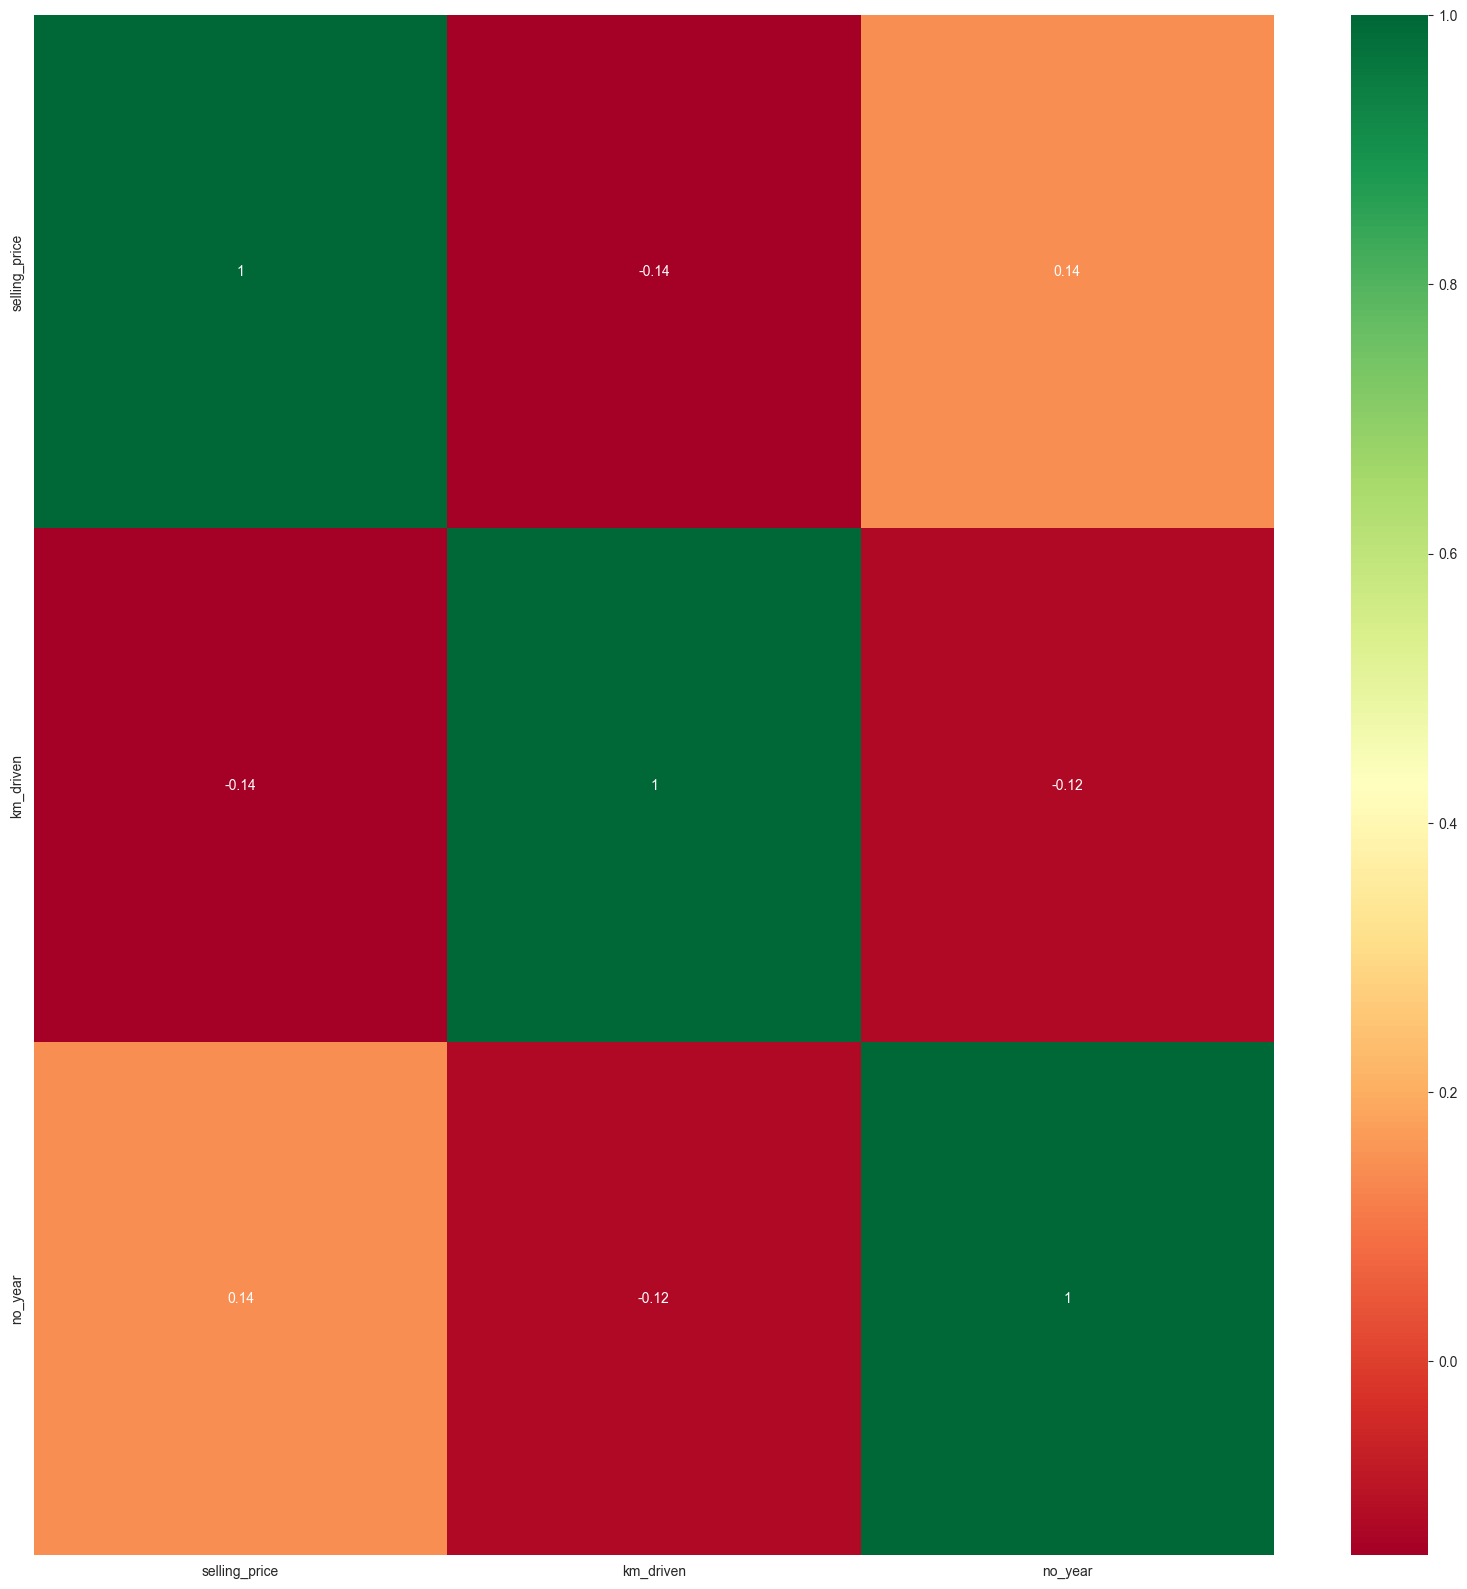

In [56]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#### Selecting Features using Correlation

In [57]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = final_dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):  # i is the index
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(final_dataset, 0.85)
print("Features with high correlation ", corr_features)

Features with high correlation  []


C:\Users\yokau\AppData\Local\Temp\ipykernel_24896\3420766491.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# import pycaret

In [10]:
# import data set
from  pycaret.datasets import get_data


# spilting data for train

In [11]:
data_train = final_dataset.sample(frac= 0.9, random_state=786)

In [58]:
data_train

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
3109,Hyundai i20 Asta (o),300000,50000,Petrol,Individual,Manual,First Owner,14
3390,Volkswagen Vento 1.5 TDI Highline,465000,130000,Diesel,Individual,Manual,First Owner,8
3182,Volkswagen Polo GTI,825000,13599,Petrol,Dealer,Automatic,First Owner,6
1323,Skoda Superb Elegance 2.0 TDI CR AT,355000,100000,Diesel,Individual,Automatic,Second Owner,14
440,Ford Figo 1.2P Ambiente MT,229999,45000,Petrol,Individual,Manual,First Owner,8
...,...,...,...,...,...,...,...,...
4324,Maruti Alto 800 Base,155000,40000,Petrol,Individual,Manual,First Owner,8
1069,Maruti Alto 800 VXI,245000,60000,Petrol,Individual,Manual,First Owner,7
3833,Mahindra TUV 300 T4 Plus,650000,60000,Diesel,Individual,Manual,First Owner,6
331,Ford Endeavour Titanium 4X2,600000,149674,Diesel,Dealer,Manual,Second Owner,12


In [13]:
data_train.shape

(3906, 8)

# spilting data for test

In [45]:
data_test = final_dataset.drop(data_train. index)

In [46]:
data_test.shape

(434, 8)

In [13]:
data_train.reset_index(inplace=True,drop=True)

In [14]:
data_train

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Hyundai i20 Asta (o),300000,50000,Petrol,Individual,Manual,First Owner,14
1,Volkswagen Vento 1.5 TDI Highline,465000,130000,Diesel,Individual,Manual,First Owner,8
2,Volkswagen Polo GTI,825000,13599,Petrol,Dealer,Automatic,First Owner,6
3,Skoda Superb Elegance 2.0 TDI CR AT,355000,100000,Diesel,Individual,Automatic,Second Owner,14
4,Ford Figo 1.2P Ambiente MT,229999,45000,Petrol,Individual,Manual,First Owner,8
...,...,...,...,...,...,...,...,...
3901,Maruti Alto 800 Base,155000,40000,Petrol,Individual,Manual,First Owner,8
3902,Maruti Alto 800 VXI,245000,60000,Petrol,Individual,Manual,First Owner,7
3903,Mahindra TUV 300 T4 Plus,650000,60000,Diesel,Individual,Manual,First Owner,6
3904,Ford Endeavour Titanium 4X2,600000,149674,Diesel,Dealer,Manual,Second Owner,12


# arranging dataset accordingly for data_test

In [47]:
data_test.reset_index(inplace=True,drop=True)

In [48]:
data_test

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti Swift VXI,550000,51000,Petrol,Individual,Manual,First Owner,4
1,Maruti Alto LX BSIII,85000,120000,Petrol,Individual,Manual,Second Owner,15
2,Hyundai EON Era Plus Sports Edition,280000,55000,Petrol,Individual,Manual,First Owner,9
3,Hyundai EON Magna Plus,360000,6000,Petrol,Individual,Manual,First Owner,5
4,Maruti Alto LXi,150000,40000,Petrol,Individual,Manual,Second Owner,12
...,...,...,...,...,...,...,...,...
429,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,9
430,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,9
431,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,14
432,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,7


# making a sample of test data 

In [17]:
data_test.to_csv('sample_test_data.csv')

# implemenation of regression

In [18]:
from pycaret.regression import *

In [19]:
setup(data = data_train, target = 'selling_price',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson')
best_model= compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,98429.0328,39065890496.6626,191015.5575,0.8704,0.4198,0.2870,2.5430
lasso,Lasso Regression,94519.1980,44162307376.7156,201650.5608,0.8565,0.4072,0.2555,2.0630
lar,Least Angle Regression,113216.1620,46162358963.8880,207007.8838,0.8491,0.4368,0.3258,0.2100
llar,Lasso Least Angle Regression,113376.0976,46205904520.1784,207072.0347,0.8491,0.4372,0.3264,0.2120
et,Extra Trees Regressor,97048.0994,48441422207.1875,211925.1418,0.8438,0.3567,0.2360,0.9930
ridge,Ridge Regression,119817.9776,47446398108.6408,211565.3729,0.8432,0.4969,0.3461,0.0920
rf,Random Forest Regressor,113456.3674,54827030668.0560,226666.2611,0.8209,0.3680,0.2688,0.6860
omp,Orthogonal Matching Pursuit,128849.4573,55429074964.7237,228039.4120,0.8182,0.4949,0.3852,0.0890
gbr,Gradient Boosting Regressor,152824.5640,61471760632.3631,243733.5253,0.7899,0.4674,0.4464,0.7180
dt,Decision Tree Regressor,117398.1752,62156079030.7100,244801.9109,0.7855,0.4395,0.2974,0.0620


In [20]:
print(best_model)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


# creating a 	Lasso Regression Machine model

In [21]:
Bayesian_Ridge=create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,118000.1388,91103637571.0961,301833.7913,0.8473,0.3844,0.2694
1,96659.2296,33500358043.2258,183031.0303,0.8971,0.2968,0.2368
2,92565.4003,30326274673.2161,174144.4075,0.8631,0.4185,0.3106
3,109888.0292,56169220941.7942,237000.4661,0.8541,0.4511,0.3285
4,112608.7518,60592124853.7399,246154.6767,0.7703,0.4643,0.3408
5,87768.8752,21290659614.5409,145913.1921,0.8767,0.4154,0.2400
6,91491.1521,18548319890.8942,136192.2167,0.9384,0.4394,0.3099
7,93920.8203,30319359247.8600,174124.5510,0.7917,0.5045,0.2603
8,91784.3511,27609812744.2270,166162.0075,0.9307,0.4236,0.2810


# tuning the Lasso Regression model further for better results

In [22]:
tuned_Bayesian_Ridge=tune_model(Bayesian_Ridge)
print(tuned_Bayesian_Ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,117990.1839,91107841004.8360,301840.7544,0.8472,0.3845,0.2693
1,96624.7794,33495901015.6846,183018.8543,0.8971,0.2967,0.2367
2,92527.5096,30321470776.7672,174130.6141,0.8631,0.4190,0.3105
3,109865.4810,56168951677.5829,236999.8981,0.8541,0.4511,0.3282
4,112623.7080,60598106906.1553,246166.8274,0.7702,0.4652,0.3408
5,87761.5181,21295335661.7260,145929.2146,0.8767,0.4139,0.2399
6,91478.0566,18550924827.3737,136201.7798,0.9384,0.4405,0.3099
7,93909.0162,30325088663.9450,174141.0022,0.7916,0.5086,0.2602
8,91767.7122,27608281706.5331,166157.4004,0.9307,0.4246,0.2809


BayesianRidge(alpha_1=0.0001, alpha_2=0.01, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=False, lambda_1=1e-06, lambda_2=0.01,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)


# plotting the r2 score

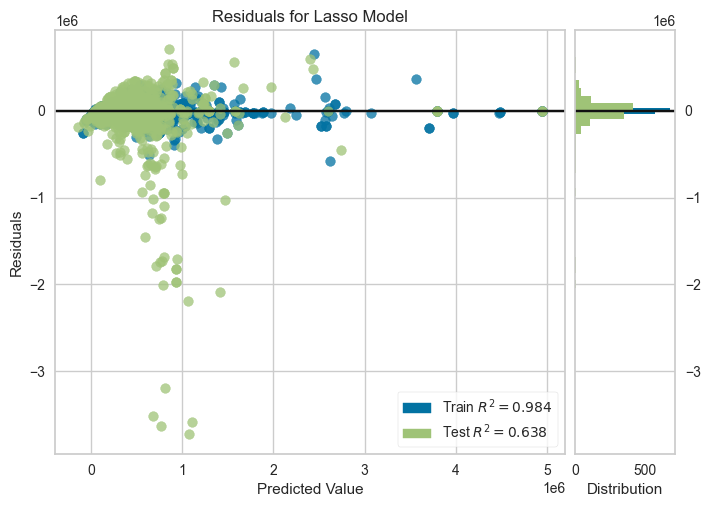

In [35]:
plot_model(tuned_Lasso_Regression)

# plotting the error for Lasso Regression Machine model

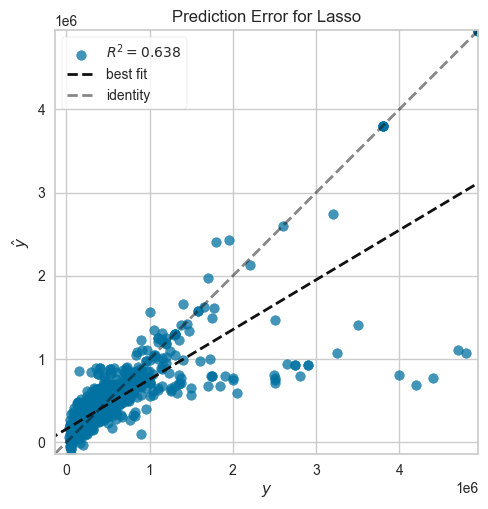

In [37]:

plot_model(tuned_Lasso_Regression, plot="error")


 # plotting all the important features fortuned_Lasso_Regression Machine model

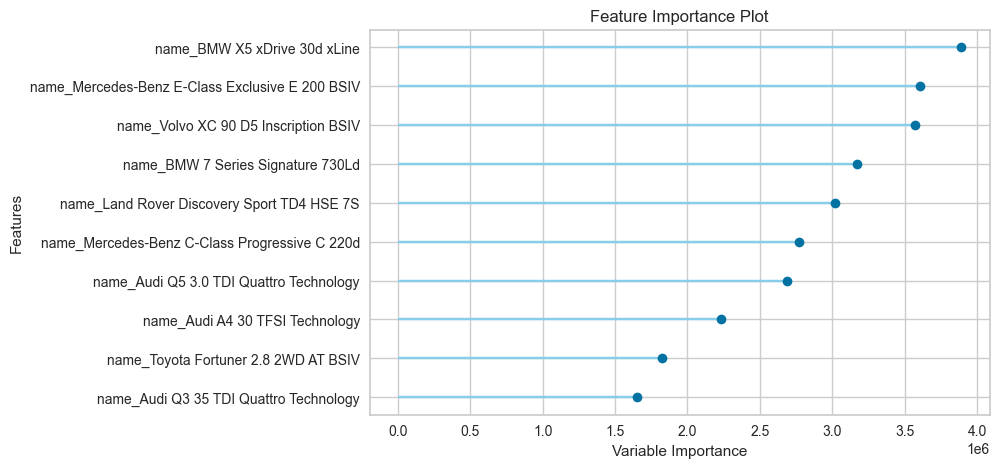

In [38]:
plot_model(tuned_Lasso_Regression, plot="feature")


---
### **Plot the "learning curve"**
---

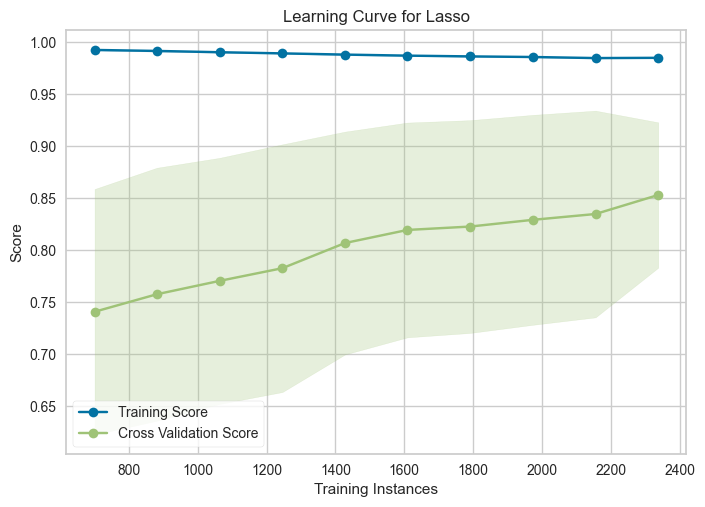

In [39]:
plot_model(tuned_Lasso_Regression, plot='learning')


### ** Plot the "validation curve"**
---

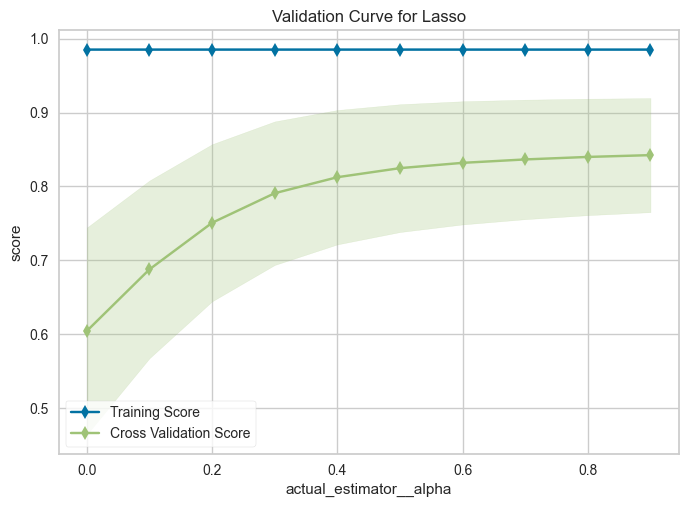

In [40]:
plot_model(tuned_Lasso_Regression, plot='vc')

# making prediction validation data

In [23]:
predict_model(tuned_Bayesian_Ridge)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,123636.4224,70850247860.5714,266177.0987,0.7062,0.4917,0.3746


,km_driven,no_year,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 3.0 TDI Quattro,name_Audi A6 2.0 TDI Design Edition,name_Audi A6 2.0 TDI Premium Plus,name_Audi A6 2.7 TDI,name_Audi A8 4.2 TDI,name_Audi Q3 2.0 TDI Quattro Premium Plus,...,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price,Label
0,-0.121039,0.439970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,385000,392139.729261
1,-0.842646,-0.980230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000,315602.773287
2,0.504021,-0.050582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,170000,173727.044897
3,-1.459806,-1.335026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,440000,513830.818764
4,0.760421,0.208246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,370000,284232.270108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1.250109,0.650678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,300000,309626.156917
1168,-2.010319,-2.104283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250000,639958.392566
1169,1.458654,-0.050582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1150000,786196.580881
1170,1.250109,1.359524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80000,70545.975979


# saving the predicted value in a variable of [predict_model(tuned_Lasso_Regression)]

In [24]:

test_pred = predict_model(tuned_Bayesian_Ridge, data=data_test)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,119209.4632,53620228125.7119,231560.4200,0.7807,0.4623,0.3338


In [25]:
test_pred 

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year,Label
0,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6,2.438700e+05
1,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,9.519289e+04
2,Tata Indigo Grand Petrol,250000,100000,Petrol,Individual,Manual,First Owner,9,2.286100e+05
3,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16,1.026330e+05
4,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,9.519289e+04
...,...,...,...,...,...,...,...,...,...
429,Mercedes-Benz E-Class E250 CDI Elegance,999000,49600,Diesel,Dealer,Automatic,First Owner,12,1.369964e+06
430,Maruti Alto 800 LXI,200000,35000,Petrol,Individual,Manual,First Owner,5,3.562495e+05
431,Maruti Swift LDI,400000,70000,Diesel,Individual,Manual,First Owner,11,4.728093e+05
432,Maruti Alto LX,114999,66782,Petrol,Individual,Manual,Second Owner,15,1.070890e+05


# saving the model

In [36]:

#save_model(tuned_BayesianRidge,"Bayesian_Ridge_Model")

s=save_model(tuned_Bayesian_Ridge , model_name = 'deployment_with_tuned_Bayesian_Ridge')

Transformation Pipeline and Model Successfully Saved


In [35]:
import pickle
pickle.dump(s,open("deployment_with_tuned_Bayesian_Ridge_1.pkl","wb"))

 # saving the model in variable

In [37]:

saved_final_model = load_model("deployment_with_tuned_Bayesian_Ridge")


Transformation Pipeline and Model Successfully Loaded


# making new prediction on saved_final_model


In [39]:
new_prediction = predict_model(saved_final_model, data=data_test)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,119209.4632,53620228125.7119,231560.4200,0.7807,0.4623,0.3338


# saving the prediction into csv file

In [40]:
# load pipeline
from pycaret.regression import load_model, predict_model
pipeline = load_model('deployment_with_tuned_Bayesian_Ridge')

# generate predictions and save to csv**
output_table_1 = predict_model(saved_final_model, data = data_test)
output_table_1.to_csv('new_predictions_with_Bayesian_Ridge.csv', index=False)

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,119209.4632,53620228125.7119,231560.4200,0.7807,0.4623,0.3338


In [41]:
new_prediction.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year,Label
0,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6,243869.959032
1,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,95192.893721
2,Tata Indigo Grand Petrol,250000,100000,Petrol,Individual,Manual,First Owner,9,228610.014605
3,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16,102633.007116
4,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,95192.893721


In [115]:
print(new_prediction['seller_type'].unique())
print(new_prediction['transmission'].unique())
print(new_prediction['owner'].unique())
print(new_prediction['fuel'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']
['Petrol' 'Diesel' 'CNG' 'LPG']


In [116]:
new_prediction.to_csv('new_prediction_tuned_Lasso_Regression')

In [ ]:
sample_df= pd.DataFrame(new_prediction)
sample_df

In [42]:
new_prediction.to_pickle("./new_prediction_tuned_Bayesian_Ridge.pkl")
unpickled_df = pd.read_pickle("./new_prediction_tuned_Bayesian_Ridge.pkl")
unpickled_df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year,Label
0,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6,2.438700e+05
1,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,9.519289e+04
2,Tata Indigo Grand Petrol,250000,100000,Petrol,Individual,Manual,First Owner,9,2.286100e+05
3,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16,1.026330e+05
4,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,16,9.519289e+04
...,...,...,...,...,...,...,...,...,...
429,Mercedes-Benz E-Class E250 CDI Elegance,999000,49600,Diesel,Dealer,Automatic,First Owner,12,1.369964e+06
430,Maruti Alto 800 LXI,200000,35000,Petrol,Individual,Manual,First Owner,5,3.562495e+05
431,Maruti Swift LDI,400000,70000,Diesel,Individual,Manual,First Owner,11,4.728093e+05
432,Maruti Alto LX,114999,66782,Petrol,Individual,Manual,Second Owner,15,1.070890e+05


In [ ]:
!mlflow ui

In [ ]:
kkll

from pycaret. regression import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np


model = load_model( "lightgbm_regression_Model")


In [51]:
data_test.to_pickle("./data_test.pkl")
unpickled_df = pd.read_pickle("./data_test.pkl")
unpickled_df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti Swift VXI,550000,51000,Petrol,Individual,Manual,First Owner,4
1,Maruti Alto LX BSIII,85000,120000,Petrol,Individual,Manual,Second Owner,15
2,Hyundai EON Era Plus Sports Edition,280000,55000,Petrol,Individual,Manual,First Owner,9
3,Hyundai EON Magna Plus,360000,6000,Petrol,Individual,Manual,First Owner,5
4,Maruti Alto LXi,150000,40000,Petrol,Individual,Manual,Second Owner,12
...,...,...,...,...,...,...,...,...
429,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,9
430,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,9
431,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,14
432,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,7


In [50]:
data_test

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti Swift VXI,550000,51000,Petrol,Individual,Manual,First Owner,4
1,Maruti Alto LX BSIII,85000,120000,Petrol,Individual,Manual,Second Owner,15
2,Hyundai EON Era Plus Sports Edition,280000,55000,Petrol,Individual,Manual,First Owner,9
3,Hyundai EON Magna Plus,360000,6000,Petrol,Individual,Manual,First Owner,5
4,Maruti Alto LXi,150000,40000,Petrol,Individual,Manual,Second Owner,12
...,...,...,...,...,...,...,...,...
429,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,9
430,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,9
431,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,14
432,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,7
